In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
from config import weather_api_key
import time
from scipy.stats import linregress
from config import g_key
import gmaps


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | svetlogorsk
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | halifax
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | killybegs
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | umea
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | envira
Processing Record 

Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | luanda
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | popondetta
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | itamarandiba
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | belmonte
Processing Record 46 of Set 4 | abu dhabi
Processing Record 47 of Set 4 | hirado
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | umba
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | kilindoni
Processing Record 2 of Set 5 | asfi
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | zaykovo
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | oksfjord
Processing Record 7 of Set 5 | tam ky
Processing Record 8 of Set 5 | madang
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Set 5 | burnie
Proc

Processing Record 22 of Set 8 | faya
Processing Record 23 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 24 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 25 of Set 8 | warrington
Processing Record 26 of Set 8 | albanel
Processing Record 27 of Set 8 | tessalit
Processing Record 28 of Set 8 | high prairie
Processing Record 29 of Set 8 | pong
Processing Record 30 of Set 8 | sinnamary
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | mulege
Processing Record 33 of Set 8 | krivosheino
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | dawson creek
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | cuamba
Processing Record 39 of Set 8 | seoni
Processing Record 40 of Set 8 | skibbereen
Processing Record 41 of Set 8 | baker city
Processing Record 42 of Set 8 | paka
Processing Record 43 of Set 8 | nizhniy baskunchak
Processing Record 44 of Se

Processing Record 10 of Set 12 | vyazovaya
Processing Record 11 of Set 12 | inirida
Processing Record 12 of Set 12 | nanjing
Processing Record 13 of Set 12 | ossora
Processing Record 14 of Set 12 | omboue
Processing Record 15 of Set 12 | sao gabriel da cachoeira
Processing Record 16 of Set 12 | souillac
Processing Record 17 of Set 12 | alencon
Processing Record 18 of Set 12 | honiara
Processing Record 19 of Set 12 | hangu
Processing Record 20 of Set 12 | puerto madryn
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | la paz
Processing Record 23 of Set 12 | wajima
Processing Record 24 of Set 12 | lethem
Processing Record 25 of Set 12 | inta
Processing Record 26 of Set 12 | anajatuba
Processing Record 27 of Set 12 | lancaster
Processing Record 28 of Set 12 | sistranda
Processing Record 29 of Set 12 | zhangjiakou
Processing Record 30 of Set 12 | yulara
Processing Record 31 of Set 12 | boromo
Processing Record 32 of Set 12 | deniliquin
Processing Record 33 of Se

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,59.77,77,94,16.71,AU,2021-09-30 03:33:35
1,Cape Town,-33.9258,18.4232,58.12,65,0,2.30,ZA,2021-09-30 03:32:03
2,Ushuaia,-54.8000,-68.3000,38.86,87,75,12.66,AR,2021-09-30 03:32:28
3,Bredasdorp,-34.5322,20.0403,56.28,83,100,17.11,ZA,2021-09-30 03:33:00
4,Punta Arenas,-53.1500,-70.9167,39.31,81,20,12.66,CL,2021-09-30 03:32:35
...,...,...,...,...,...,...,...,...,...
549,Kanelovskaya,46.5908,39.1900,44.53,58,0,11.39,RU,2021-09-30 03:36:09
550,Usolye,59.4268,56.6808,35.22,96,100,3.47,RU,2021-09-30 03:36:10
551,Mataram,-8.5833,116.1167,86.81,60,31,11.25,ID,2021-09-30 03:36:10
552,Tierralta,8.1736,-76.0592,74.44,93,100,2.64,CO,2021-09-30 03:36:10


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

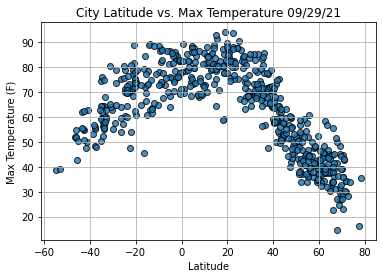

In [9]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

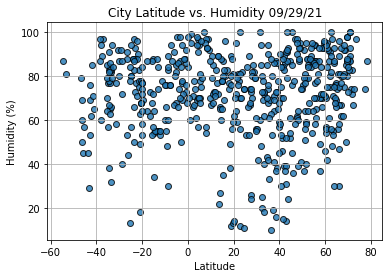

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

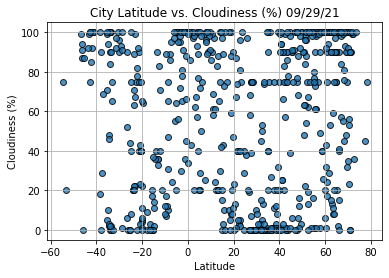

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

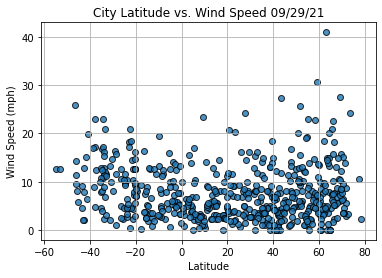

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


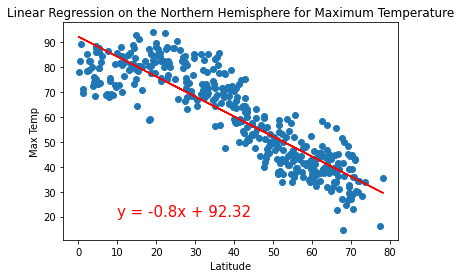

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

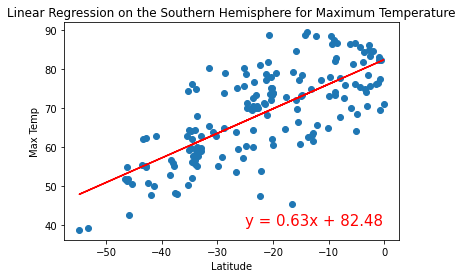

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,40))

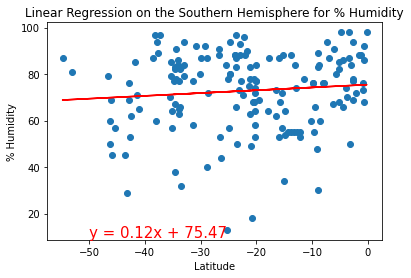

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,10))

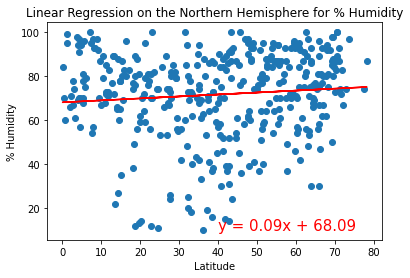

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

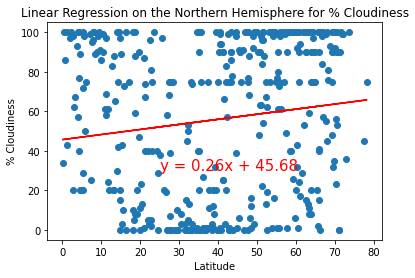

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness','% Cloudiness',(25,30))

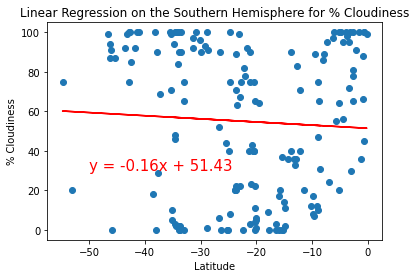

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness','% Cloudiness',(-50,30))

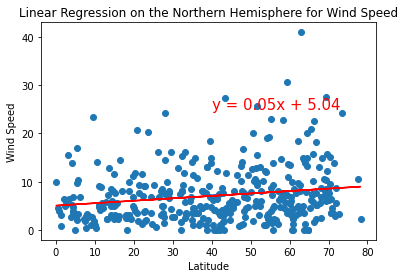

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

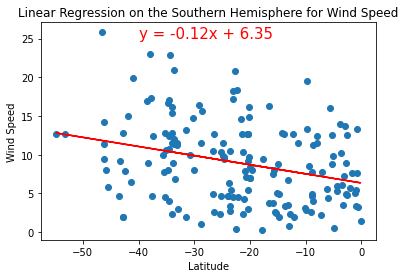

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,25))